## Hundling ssdse Data 
---
Seiichi Inoue


### Settings

In [138]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.style.use('ggplot')

font = {"family":"IPAGothic"}
    
mpl.rc('font', **font)

### Import

In [181]:
ssdse = pd.read_csv("SSDSE.csv", header=1, index_col=1)

### Look Data

In [182]:
ssdse.head()

,地域コード,市区町村,人口総数,人口総数（男）,人口総数（女）,日本人人口,日本人人口（男）,日本人人口（女）,１５歳未満人口,１５歳未満人口（男）,...,飲食店数,大型小売店数,一般病院数,一般診療所数,歯科診療所数,医師数,歯科医師数,薬剤師数,保育所等数,保育所等在所児数
都道府県,,,,,,,,,,,,,,,,,,,,,
北海道,R01100,札幌市,1952356,910614,1041742,1937785,903535,1034250,221013,112743,...,9124,377,179,1317,1237,6418,2118,5015,258,25037
北海道,R01202,函館市,265979,120376,145603,264537,119819,144718,27131,13912,...,1872,43,28,215,131,777,185,672,45,3494
北海道,R01203,小樽市,121924,54985,66939,121415,54722,66693,11171,5661,...,821,19,12,84,79,301,106,359,21,1394
北海道,R01204,旭川市,339605,156402,183203,335678,154716,180962,37173,18938,...,1840,74,36,243,179,1280,253,826,62,5405
北海道,R01205,室蘭市,88564,43143,45421,88203,42935,45268,9185,4647,...,669,7,6,53,46,284,63,191,10,986


In [183]:
ssdse.sort_values("人口総数", ascending=False).head(5)

,地域コード,市区町村,人口総数,人口総数（男）,人口総数（女）,日本人人口,日本人人口（男）,日本人人口（女）,１５歳未満人口,１５歳未満人口（男）,...,飲食店数,大型小売店数,一般病院数,一般診療所数,歯科診療所数,医師数,歯科医師数,薬剤師数,保育所等数,保育所等在所児数
都道府県,,,,,,,,,,,,,,,,,,,,,
神奈川県,R14100,横浜市,3724844,1855985,1868859,3623330,1803061,1820269,468535,239953,...,13155,488,114,2946,2082,8144,3324,9623,621,51369
大阪府,R27100,大阪市,2691185,1302562,1388623,2497380,1205611,1291769,295298,151063,...,26145,556,183,3403,2261,9182,2964,10336,349,39264
愛知県,R23100,名古屋市,2295638,1133640,1161998,2213811,1095360,1118451,282497,144830,...,16862,381,119,2049,1436,7008,2255,6004,382,39500
北海道,R01100,札幌市,1952356,910614,1041742,1937785,903535,1034250,221013,112743,...,9124,377,179,1317,1237,6418,2118,5015,258,25037
福岡県,R40130,福岡市,1538681,726666,812015,1478656,696551,782105,199923,102307,...,9778,252,103,1493,1018,5851,2179,4227,196,30681


### 変数の種類

In [184]:
print(ssdse.columns.values)

['地域コード' '市区町村' '人口総数' '人口総数（男）' '人口総数（女）' '日本人人口' '日本人人口（男）' '日本人人口（女）'
 '１５歳未満人口' '１５歳未満人口（男）' '１５歳未満人口（女）' '１５〜６４歳人口' '１５〜６４歳人口（男）'
 '１５〜６４歳人口（女）' '６５歳以上人口' '６５歳以上人口（男）' '６５歳以上人口（女）' '７５歳以上人口' '７５歳以上人口（男）'
 '７５歳以上人口（女）' '外国人人口' '出生数' '死亡数' '転入者数' '転出者数' '世帯数' '一般世帯数' '一般世帯人員数'
 '核家族世帯数' '単独世帯数' '６５歳以上の世帯員のいる核家族世帯数' '高齢夫婦のみの世帯数' '高齢単身世帯数（６５歳以上の者１人）'
 '婚姻件数' '離婚件数' '総面積（北方地域及び竹島を除く）' '可住地面積' '事業所総数' '事業所数（農業，林業）'
 '事業所数（建設業）' '事業所数（製造業）' '事業所数（電気・ガス・熱供給・水道業）' '事業所数（情報通信業）'
 '事業所数（運輸業，郵便業）' '事業所数（卸売業，小売業）' '事業所数（金融業，保険業）' '事業所数（不動産業，物品賃貸業）'
 '事業所数（学術研究，専門・技術サービス業）' '事業所数（宿泊業，飲食サービス業）' '事業所数（生活関連サービス業，娯楽業）'
 '事業所数（教育，学習支援業）' '事業所数（医療，福祉）' '事業所数（複合サービス事業）' '事業所数（サービス業（他に分類されないもの））'
 '事業所数（公務（他に分類されるものを除く））' '第１次産業事業所数' '第２次産業事業所数' '第３次産業事業所数' '従業者総数'
 '従業者数（農業，林業）' '従業者数（建設業）' '従業者数（製造業）' '従業者数（電気・ガス・熱供給・水道業）' '従業者数（情報通信業）'
 '従業者数（運輸業，郵便業）' '従業者数（卸売業，小売業）' '従業者数（金融業，保険業）' '従業者数（不動産業，物品賃貸業）'
 '従業者数（学術研究，専門・技術サービス業）' '従業者数（宿泊業，飲食サービス業）' '従業者数（生活関連サービス業，娯楽業）'
 '従業者数（教育，学習支援業）' '従業者数（医療，福祉）'

### 相関関係

In [185]:
def random_scatter(row: int=3, col: int=3):
    
    import random
    from sklearn.linear_model import LinearRegression
    
    fig,axes = plt.subplots(row,col,figsize=(5*col,5*row))
    
    for n in range(row*col):
        area=axes[n//col][n%col]
        x,y=random.sample(list(ssdse.columns.values[3:]),2)
        
        area.scatter(x=x, y=y, data=ssdse, s=12, alpha=0.3,
                     label="Data of each Pref.")
        area.set_xlabel(x)
        area.set_ylabel(y)

        reg = LinearRegression()
        reg.fit(ssdse[x].values.reshape(-1, 1), ssdse[y])

        area.plot(np.linspace(0, ssdse[x].max(), 10),
                  reg.predict(np.linspace(0, ssdse[x].max(), 10).reshape(-1, 1)),
                  color="indigo", label="Linear Regression")


        corr_coef = np.corrcoef(x=ssdse[x], y=ssdse[y])[0][1].round(3)

        area.legend(title="回帰: y={}x+({})\n相関係数: {}"
                    .format(round(reg.coef_[0], 2), round(reg.intercept_, 2), corr_coef), 
                    fontsize=10, fancybox=False)

    fig.tight_layout()

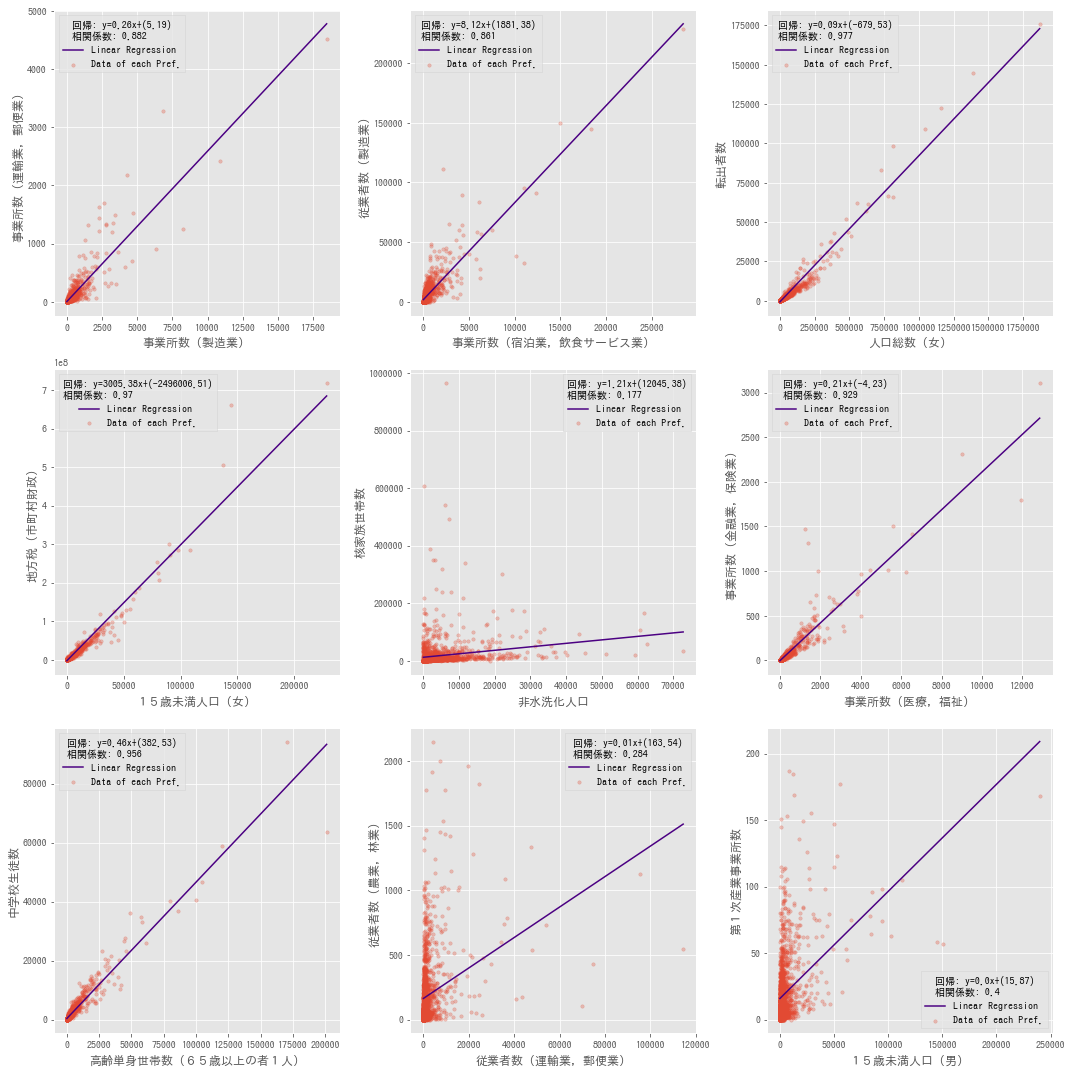

In [186]:
random_scatter()

- マルチコがひどそう

### データの可視化

<BarContainer object of 1741 artists>

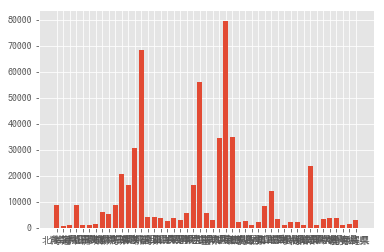

In [187]:
# 外国人人口
plt.bar(ssdse.index.values, ssdse["外国人人口"].values)

### 因子分析; コレスポンデンス分析

In [216]:
copied=ssdse

In [217]:
# カテゴリ変数の削除
copied=copied.drop("地域コード", axis=1)
copied=copied.drop("市区町村", axis=1)

In [218]:
copied.head()

,人口総数,人口総数（男）,人口総数（女）,日本人人口,日本人人口（男）,日本人人口（女）,１５歳未満人口,１５歳未満人口（男）,１５歳未満人口（女）,１５〜６４歳人口,...,飲食店数,大型小売店数,一般病院数,一般診療所数,歯科診療所数,医師数,歯科医師数,薬剤師数,保育所等数,保育所等在所児数
都道府県,,,,,,,,,,,,,,,,,,,,,
北海道,1952356,910614,1041742,1937785,903535,1034250,221013,112743,108270,1235516,...,9124,377,179,1317,1237,6418,2118,5015,258,25037
北海道,265979,120376,145603,264537,119819,144718,27131,13912,13219,152154,...,1872,43,28,215,131,777,185,672,45,3494
北海道,121924,54985,66939,121415,54722,66693,11171,5661,5510,65317,...,821,19,12,84,79,301,106,359,21,1394
北海道,339605,156402,183203,335678,154716,180962,37173,18938,18235,191423,...,1840,74,36,243,179,1280,253,826,62,5405
北海道,88564,43143,45421,88203,42935,45268,9185,4647,4538,49005,...,669,7,6,53,46,284,63,191,10,986


In [219]:
X=copied.values
y=copied.index.values

In [208]:
import mca

ncols=copied.shape[1]
mca_ben = mca.MCA(copied, ncols=ncols, benzecri=False)
mca_ben.fs_r(N=2)[:5]

array([[ 0.03489018, -0.01304137],
       [ 0.00700518, -0.11530141],
       [-0.00544616, -0.09590009],
       [ 0.00759422, -0.07841058],
       [ 0.01240735, -0.05049364]])

In [209]:
mca_ben.fs_c(N=2)[:5]

array([[0.17834201, 0.05205088],
       [0.18330792, 0.06239727],
       [0.17363571, 0.04224537],
       [0.17364707, 0.04845598],
       [0.17839616, 0.05865755]])

In [210]:
result_row = pd.DataFrame(mca_ben.fs_r(N=2))
result_row.index = list(copied.index)
result_row.head()

,0,1
北海道,0.034890,-0.013041
北海道,0.007005,-0.115301
北海道,-0.005446,-0.095900
北海道,0.007594,-0.078411
北海道,0.012407,-0.050494


In [211]:
# 表側の座標を書き出す
result_col = pd.DataFrame(mca_ben.fs_c(N=2))
result_col.index = list(copied.columns)
result_col.head()

,0,1
人口総数,0.178342,0.052051
人口総数（男）,0.183308,0.062397
人口総数（女）,0.173636,0.042245
日本人人口,0.173647,0.048456
日本人人口（男）,0.178396,0.058658


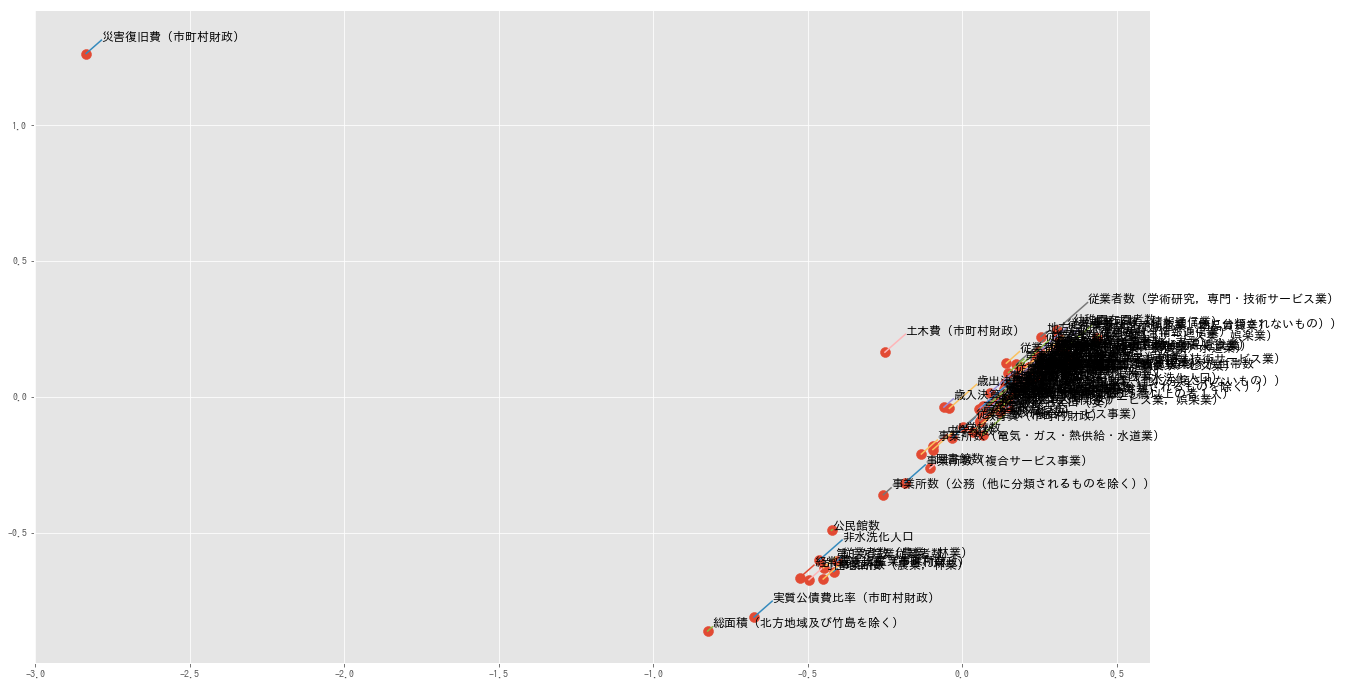

In [212]:
import random as rnd
import matplotlib

plt.rcParams["figure.figsize"] = [20, 12] # グラフのサイズを指定
plt.rcParams['font.size'] = 12 #フォントサイズを設定 default : 12
plt.rcParams['xtick.labelsize'] = 10 # 横軸のフォントサイズ
plt.rcParams['ytick.labelsize'] = 10 # 縦軸のフォントサイズ
matplotlib.font_manager._rebuild()

# 表頭をプロット
plt.scatter(result_col[0], result_col[1], s=100, marker="o")

# ラベル付け
cnt = 0
for label in list(result_col.index):
    r = rnd.random() * 0.1
    plt.text(result_col.iloc[cnt, 0]+r, result_col.iloc[cnt, 1]+r, label)
    plt.plot([result_col.iloc[cnt, 0]+r, result_col.iloc[cnt, 0]], [result_col.iloc[cnt, 1]+r, result_col.iloc[cnt, 1]])
    cnt += 1

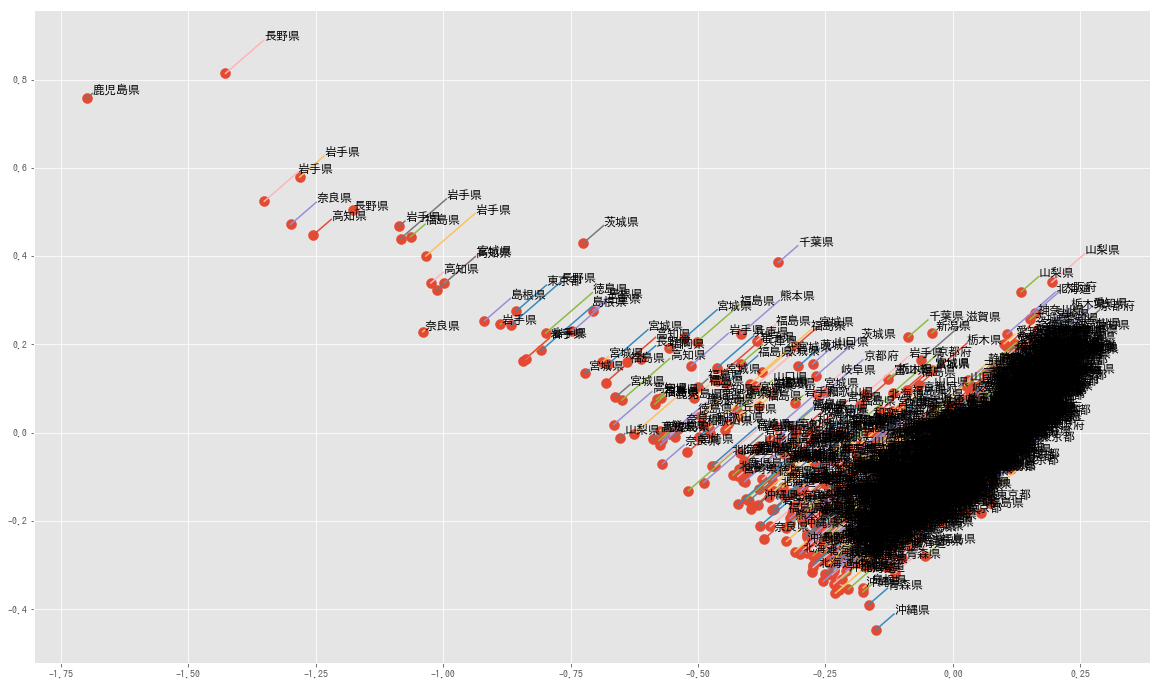

In [213]:
# 表側をプロット
plt.scatter(result_row[0], result_row[1], s=100, marker="o")
# ラベル付け
cnt = 0
for label in list(result_row.index):
    r = rnd.random() * 0.1
    plt.text(result_row.iloc[cnt, 0]+r, result_row.iloc[cnt, 1]+r, label)
    plt.plot([result_row.iloc[cnt, 0]+r, result_row.iloc[cnt, 0]], [result_row.iloc[cnt, 1]+r, result_row.iloc[cnt, 1]])
    cnt += 1

- 結果: 意味不明なり

### 主成分分析
- まずは主成分分析をして，特徴量の削減をしてみる

#### データセットの作成，標準化

In [222]:
X

array([[1.952356e+06, 9.106140e+05, 1.041742e+06, ..., 5.015000e+03,
        2.580000e+02, 2.503700e+04],
       [2.659790e+05, 1.203760e+05, 1.456030e+05, ..., 6.720000e+02,
        4.500000e+01, 3.494000e+03],
       [1.219240e+05, 5.498500e+04, 6.693900e+04, ..., 3.590000e+02,
        2.100000e+01, 1.394000e+03],
       ...,
       [1.194000e+03, 6.390000e+02, 5.550000e+02, ..., 0.000000e+00,
        1.000000e+00, 3.500000e+01],
       [3.998000e+03, 2.057000e+03, 1.941000e+03, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.843000e+03, 1.147000e+03, 6.960000e+02, ..., 0.000000e+00,
        1.000000e+00, 3.500000e+01]])

In [228]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(list(y))

In [229]:
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler

In [230]:
# 標準化
sc = StandardScaler()
data_sc = sc.fit_transform(X)

# 主成分分析
pca = PCA(n_components=2)
pca.fit(data_sc)

data_pca = pca.fit_transform(data_sc)

In [231]:
len(y)

1741

In [232]:
len(list(data_pca))

1741

Text(0,0.5,'pc2')

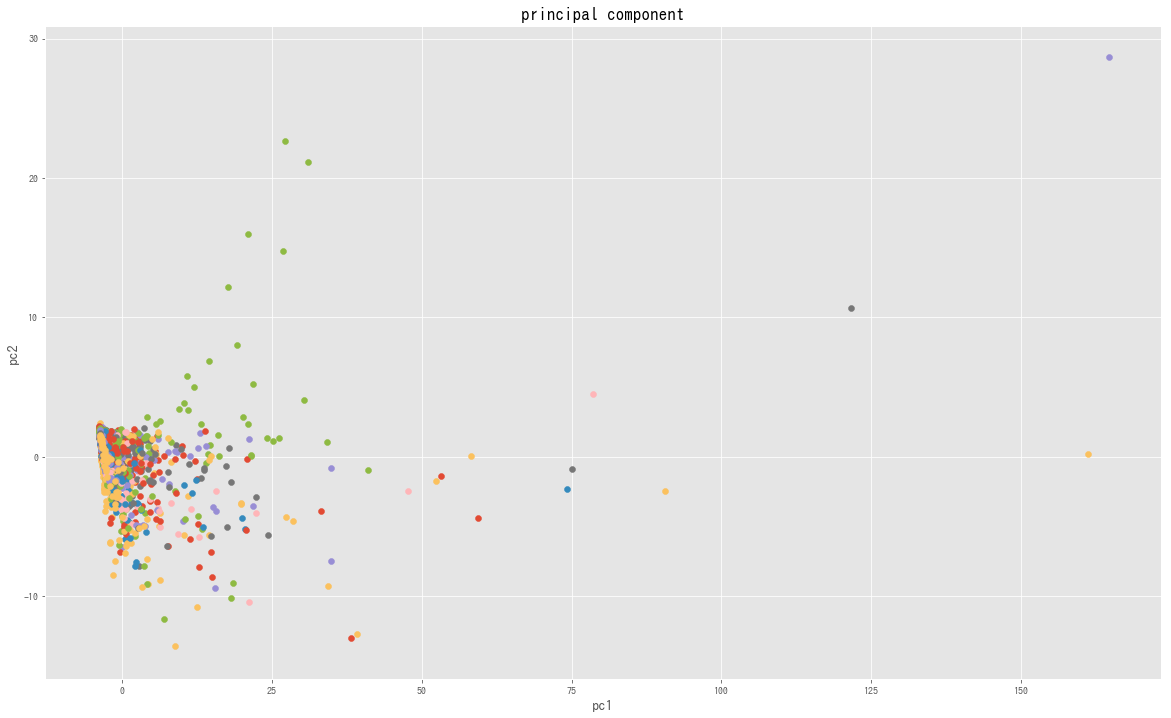

In [233]:
# 主成分をプロットする
for index, label in enumerate(np.unique(y)):
    plt.scatter(data_pca[y == label, 0],
                data_pca[y == label, 1])
plt.title('principal component')
plt.xlabel('pc1')
plt.ylabel('pc2')

#### 因子負荷量の算出
- 因子負荷量を算出して，主成分を解釈する

In [236]:
index = copied.columns.values

In [237]:
# 因子負荷量の算出
loading_matrix = pca.components_ * np.c_[np.sqrt(pca.explained_variance_)]

# インデックスと固有ベクトルを対応させる
loading_data = pd.DataFrame({
    '特徴量': index
    ,'pc1' : loading_matrix[0]
    ,'pc2' : loading_matrix[1]
})

##### 第一主成分軸

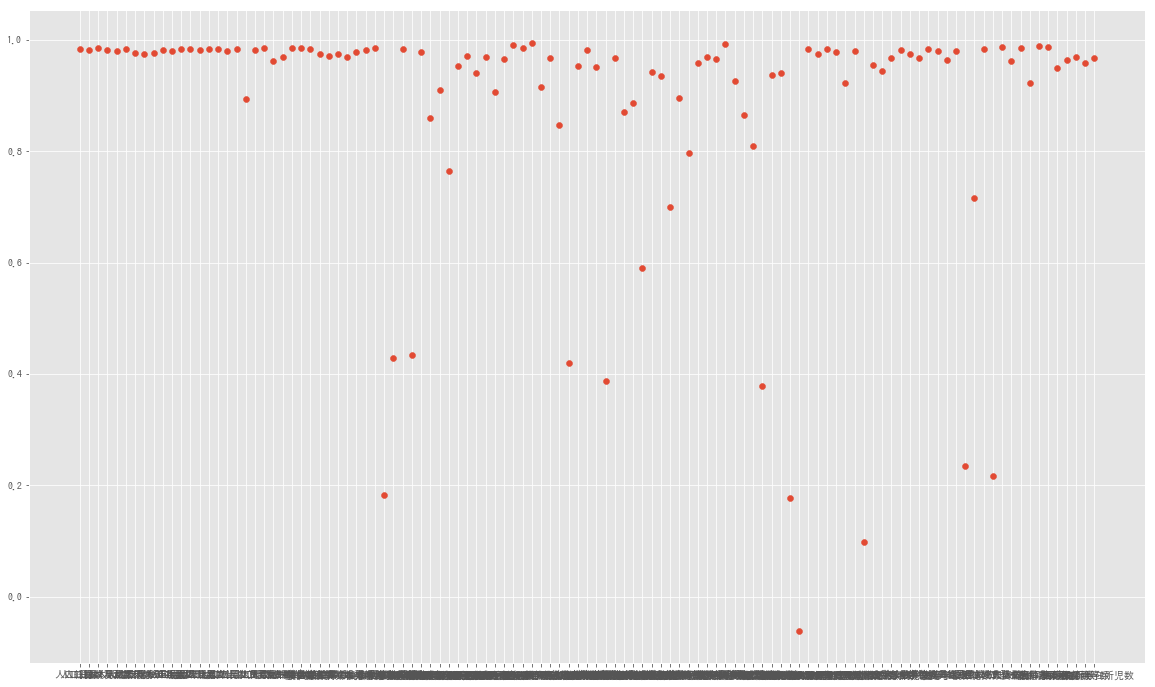

In [238]:
plt.scatter(loading_data['特徴量'], loading_data['pc1'])

- 変数が多すぎて寄与がはっきりわからない．

##### 第二主成分軸

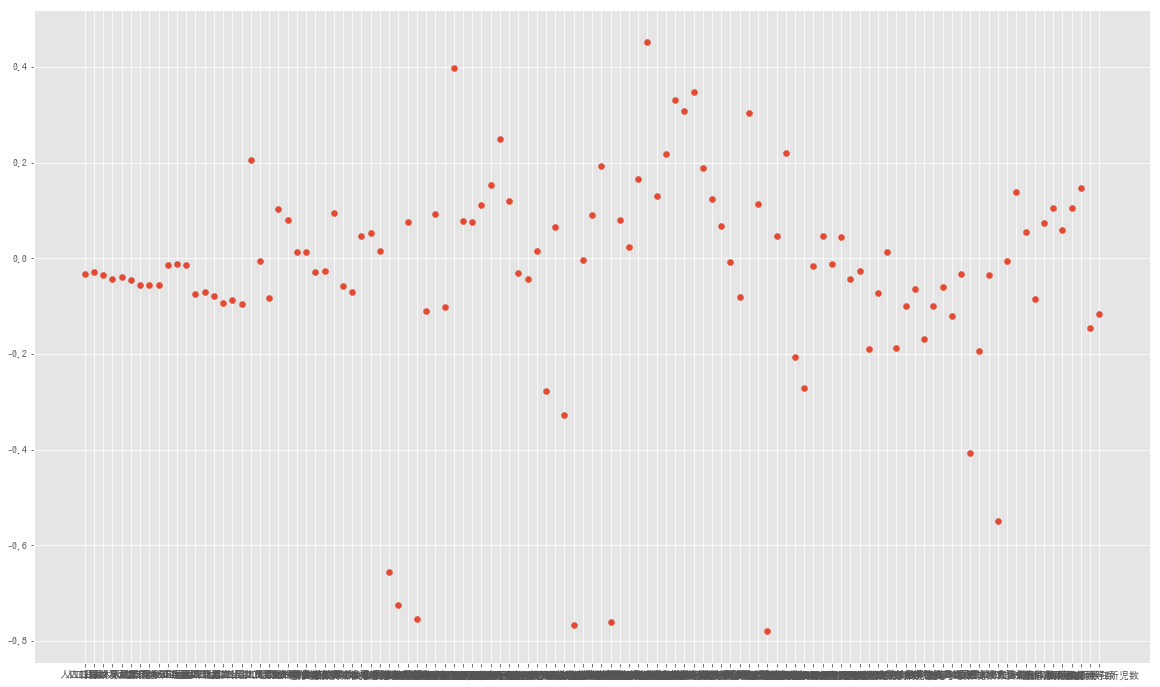

In [239]:
plt.scatter(loading_data['特徴量'], loading_data['pc2'])

In [240]:
pca_abs = pd.DataFrame({'pc1_abs':[abs(i) for i in loading_data["pc1"].values],
                        'pc2_abs':[abs(j) for j in loading_data["pc2"].values]})
                         
pca_abs.head()

,pc1_abs,pc2_abs
0,0.984396,0.032600
1,0.982495,0.029437
2,0.985549,0.035593
3,0.982695,0.042550
4,0.980802,0.039816


In [241]:
ld = pd.concat([loading_data, pca_abs], axis=1)

In [242]:
ld.sort_values("pc1_abs", ascending=False).head(10)

,特徴量,pc1,pc2,pc1_abs,pc2_abs
49,事業所数（医療，福祉）,0.995095,0.015106,0.995095,0.015106
70,従業者数（医療，福祉）,0.993015,-0.008484,0.993015,0.008484
47,事業所数（生活関連サービス業，娯楽業）,0.991025,-0.030411,0.991025,0.030411
104,一般診療所数,0.988342,0.073719,0.988342,0.073719
100,小売店数,0.987277,-0.006101,0.987277,0.006101
105,歯科診療所数,0.986804,0.105239,0.986804,0.105239
24,一般世帯数,0.986228,0.013224,0.986228,0.013224
23,世帯数,0.986183,0.013063,0.986183,0.013063
102,大型小売店数,0.985936,0.055420,0.985936,0.055420
2,人口総数（女）,0.985549,-0.035593,0.985549,0.035593


In [243]:
ld.sort_values("pc2_abs", ascending=False).head(10)

,特徴量,pc1,pc2,pc1_abs,pc2_abs
74,第１次産業従業者数,0.378283,-0.778968,0.378283,0.778968
53,第１次産業事業所数,0.419380,-0.766282,0.419380,0.766282
57,従業者数（農業，林業）,0.388169,-0.759584,0.388169,0.759584
36,事業所数（農業，林業）,0.433490,-0.753072,0.433490,0.753072
34,可住地面積,0.429082,-0.725108,0.429082,0.725108
33,総面積（北方地域及び竹島を除く）,0.183489,-0.656691,0.183489,0.656691
99,非水洗化人口,0.217065,-0.549961,0.217065,0.549961
61,従業者数（情報通信業）,0.589632,0.451139,0.589632,0.451139
96,公民館数,0.234037,-0.408094,0.234037,0.408094
40,事業所数（情報通信業）,0.764669,0.396626,0.764669,0.396626


- 第一主成分では，変数間の因子負荷量の差が小さく，第一主成分軸の意味を推察することは難しそう．
- 第二主成分では，上記の上位10位くらいでだいたい表現できそうなことがわかる．

#### 寄与率の算出

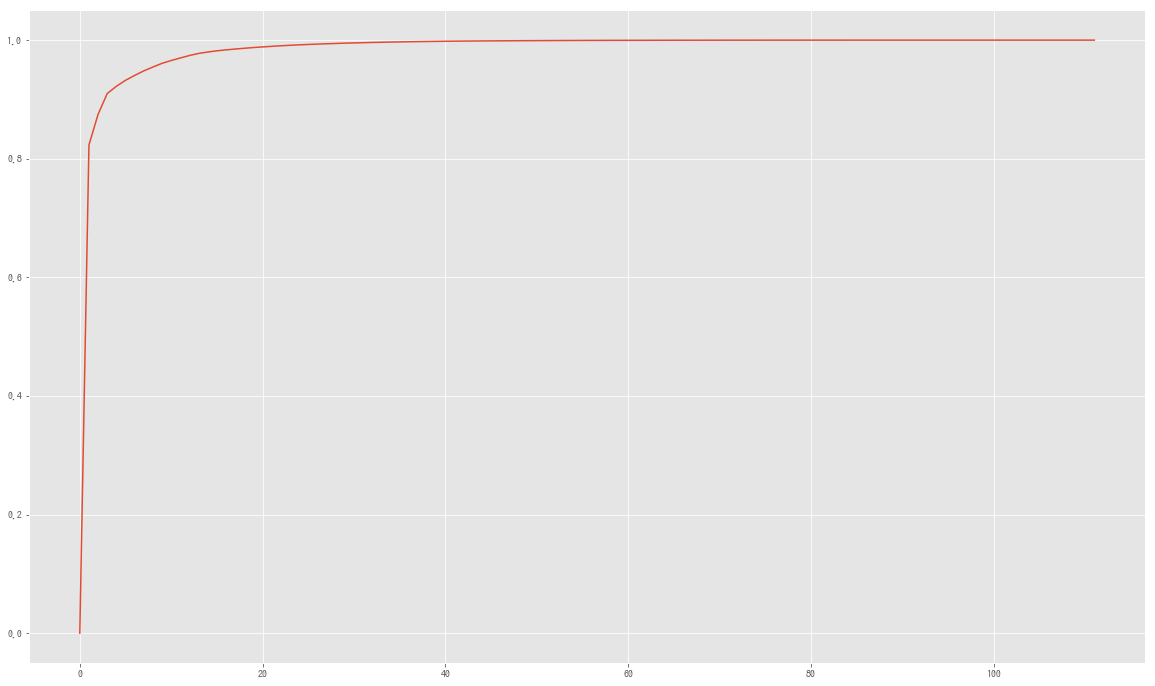

In [244]:
pca = PCA()
pca.fit(data_sc)
ev_ratio = pca.explained_variance_ratio_
ev_ratio = np.hstack([0,ev_ratio.cumsum()])
plt.plot(ev_ratio)
plt.show()

- 上図は累積寄与率のプロットだが，第2主成分まででもほぼ主成分軸が説明できていることがわかる．

### 決定木学習

In [135]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy',max_depth=4, random_state=0)
# 学習
tr = tree.fit(X, y)

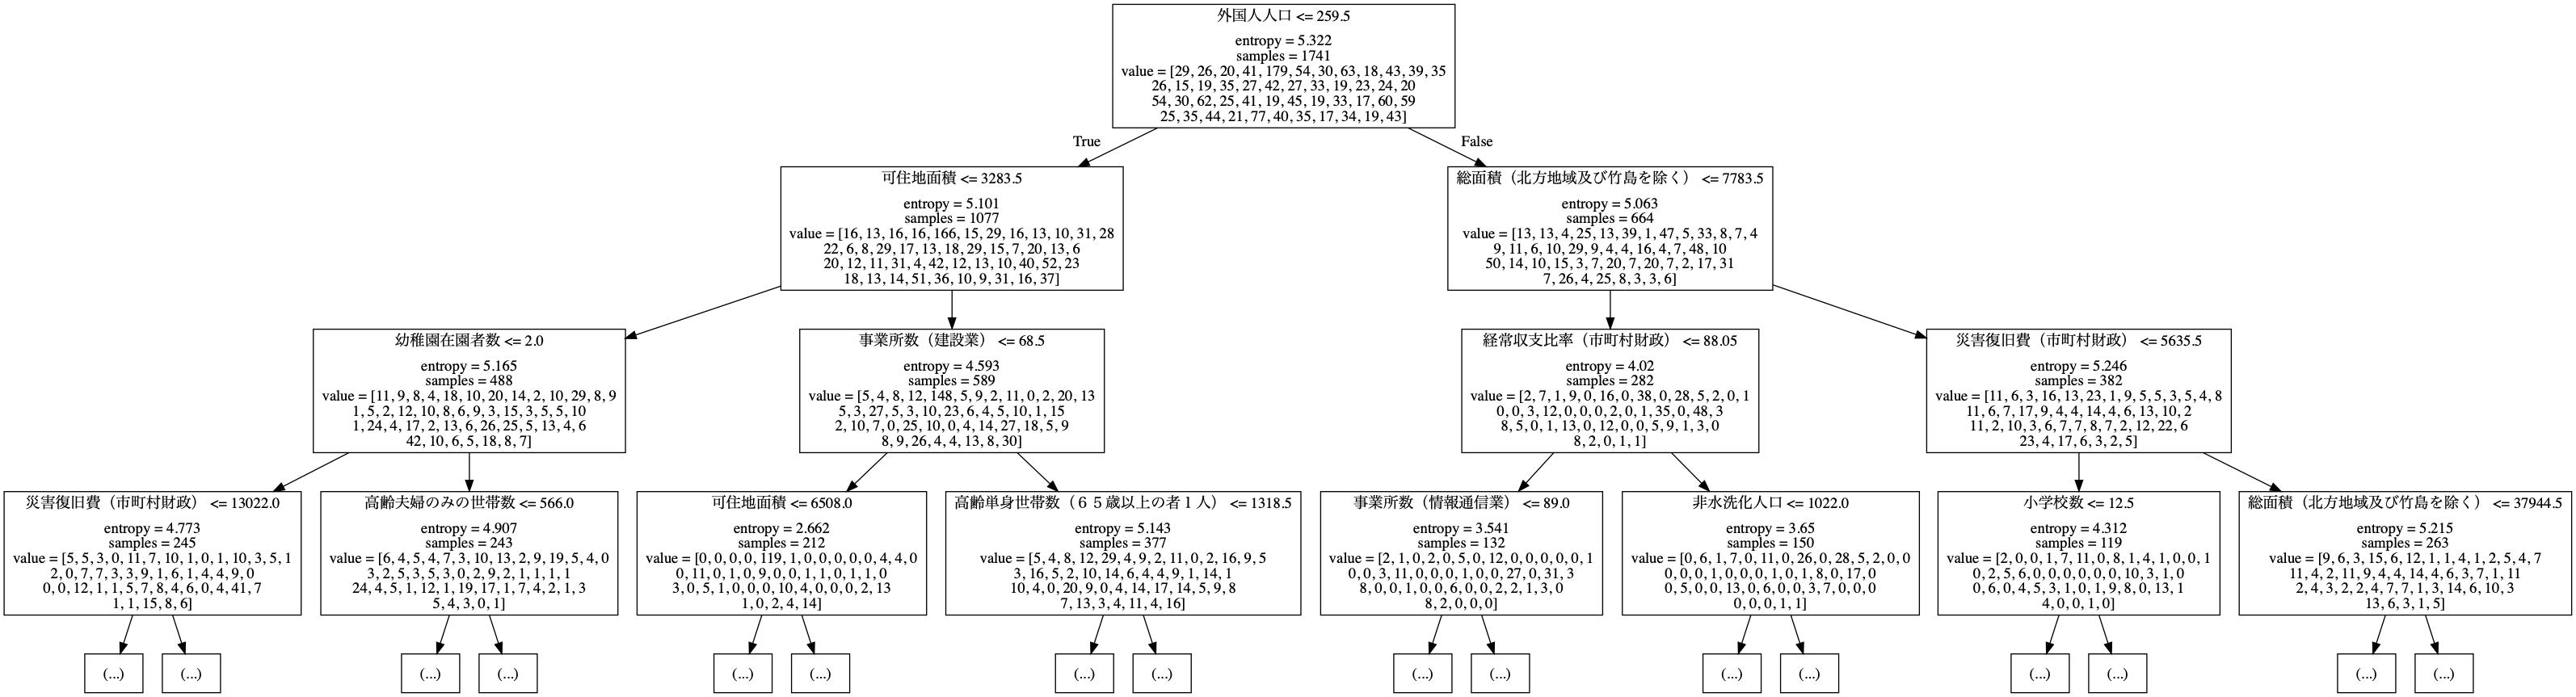

In [136]:
#可視化
import pydotplus
from IPython.display import Image
from sklearn.tree import export_graphviz
from graphviz import Digraph
from sklearn.externals.six import StringIO

dot_data = StringIO()
export_graphviz(tr, out_file=dot_data,feature_names=index, max_depth=3)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("graph.pdf")
Image(graph.create_png())

- なんとなく変数の寄与率がわかる気がする．